# TEST Fast5Tools package

## Imports

In [1]:
# pycl imports
from pycl.pycl import head, tail, cat, linerange, fastcount, dir_walk, mkdir, hide_traceback, larger_display, jprint
from pycl.pycl import jhelp as help
import numpy as np
import pandas as pd

# Matplotlib imports
from matplotlib import pyplot as pl
%matplotlib inline
pl.rcParams['figure.figsize'] = 40, 5
pl.rcParams['font.family'] = 'sans-serif'
pl.rcParams['font.sans-serif'] = ['DejaVu Sans']
pl.style.use('ggplot')
pd.options.display.max_colwidth = 200
pd.options.display.max_columns = 200

# Jupyter tweaking
#hide_traceback()
larger_display(100)

from Fast5Tools.Fast5 import Fast5, Fast5Error
from Fast5Tools.Helper_fun import find_fast5_files_gen

# Test Fast5

## Fast5 init

In [2]:
help (Fast5.__init__, full=True)

Parse a Fast5 file basecalled by albacore 2.0+ with h5py and extract the datasets raw, events and fastq.

The sequence and quality are extracted from the fastq and the event array is collapsed per contiguous kmers

* fast5_fn: STR

Path to a fast5 file basecalled by albacore 2.0+

* analyses_group: STR (default Basecall_1D_000)

Name of the basecall analyses group in the fast5 file. If None the no basecall values will be fetched

* raw_read_num: INT (default 0)

Index of the raw read values in the raw group in the fast5 file. If None the no raw values will be fetched

In [4]:
f = Fast5 (fast5_fn="./data/0/RNA_control_01.fast5", verbose=True)
print (f)

Read Fast5 File
Process collected basecalling information
	Extract information from fastq sequence
	Collapse events per kmers
[Fast5] file:./data/0/RNA_control_01.fast5
	Read ID: 6f0bc9b6-3805-4657-87fe-8181588bdcf8
	Count Raw signals: 21345
	Sequence: AGUGUGUUAGCUGUGCCGGUGGCUG...
	Mean Read Qual: 15.85
	Count Kmers: 187
	Count Empty Kmers: 38



In [7]:
f = Fast5 (fast5_file="./data/0/RNA_control_0.fast5")
print (f)

Fast5Error: Invalid File

In [8]:
f = Fast5 (fast5_file="./data/0/RNA_control_01.fast5", analyses_group="")
print (f)

Fast5Error: No Basecall Value

In [9]:
f = Fast5 (fast5_file="./data/0/RNA_control_01.fast5", raw_read_num=1)
print (f)

Fast5Error: No Raw Value

In [10]:
f = Fast5 (fast5_file="./data/0/RNA_control_01.fast5", max_len=100)
print (f)

Fast5Error: Long Sequence

In [11]:
f = Fast5 (fast5_file="../data/0/RNA_control_01.fast5", min_len=200)
print (f)

Fast5Error: Invalid File

In [12]:
f = Fast5 (fast5_file="./data/0/RNA_control_01.fast5", min_read_qual=20)
print (f)

Fast5Error: Low quality

## Test Properties

In [7]:
f = Fast5 (fast5_file="./data/0/RNA_control_02.fast5")
print("seq_from_fastq: ", f.seq)
print("seq_from_kmers: ", f.seq_from_kmers)
print("mean_qual: ", f.mean_qual)
print("n_kmers: ", f.n_kmers)
print("n_empty_kmers: ", f.n_empty_kmers)
print("n_raw: ", f.n_raw)

seq_from_fastq:  UGUGAGUUGACGUGUUUAGUCGCGGAGCUGAAGCUGCGUAGUUGUUGACGGGUGUGUGGUGUAUAACAUGUGUAAAUCCCAUACCCACAUCACAACCAUUUACUCCCACAUCCCUCAAACCCAG
seq_from_kmers:  TGTGAGTTGACGTGTTTAGTCGCGGAGCTGAAGCTGCGTAGTTGTTGACGGGTGTGTGGTGTATAACATGTGTAAATCCCATACCCACATCACAACCATTTACTCCCACATCCCTCAAACCCAG
mean_qual:  15.3306451613
n_kmers:  120
n_empty_kmers:  92
n_raw:  13691


In [25]:
pp(f.tracking_id)
pp(f.channel_id)
pp(f.context_tags)

OrderedDict([('asic_id', '3038386225'),
             ('asic_id_eeprom', '2018806'),
             ('asic_temp', '26.690376'),
             ('asic_version', 'IA02C'),
             ('auto_update', '0'),
             ('auto_update_source',
              'https://mirror.oxfordnanoportal.com/software/MinKNOW/'),
             ('bream_is_standard', '0'),
             ('device_id', 'MN24205'),
             ('device_type', 'minion'),
             ('exp_script_name',
              'bdb0a03094684b26c87d3e01300dc343c5387145-fecf8e7a17b899440fd3c4114740004c0bf3761f'),
             ('exp_script_purpose', 'sequencing_run'),
             ('exp_start_time', '2018-05-22T15:33:46Z'),
             ('flow_cell_id', 'FAH20140'),
             ('heatsink_temp', '34.152344'),
             ('hostname', 'nanopore-OptiPlex-7040'),
             ('installation_type', 'nc'),
             ('local_firmware_file', '1'),
             ('operating_system', 'ubuntu 16.04'),
             ('protocol_run_id', '46dfb0ec-5a6e-4f

## Test plot_raw

In [7]:
help (Fast5.plot_raw, full=True)

Plot raw signal and kmers boundaries

* start INT

If defined the raw plot will start at that value

* end INT

If defined the raw plot will end at that value

* kmer_boundaries BOOL

If True the start and end position of each kmer will be indicated by vertical lines on the graph

* smoothing_win_size INT

If larger than 0 will smooth the signal with a moving median window of size X

* zscore_norm: BOOL (default False)

If True the raw will be normalized using the zscore formula

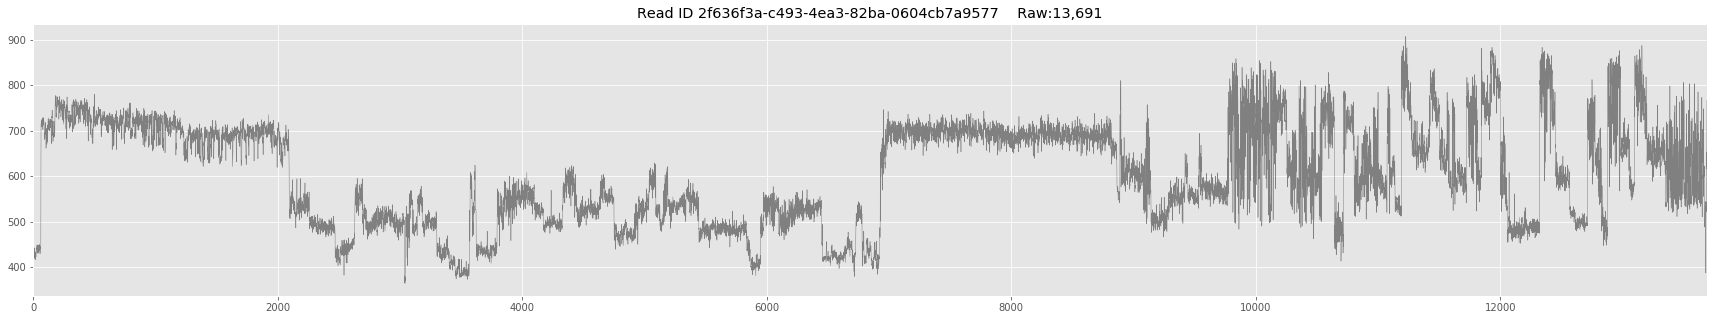

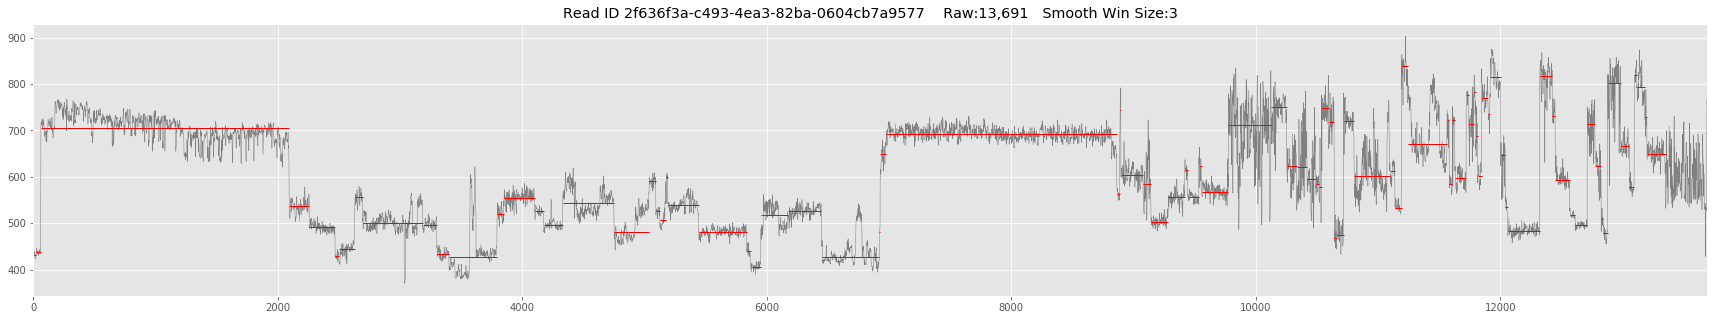

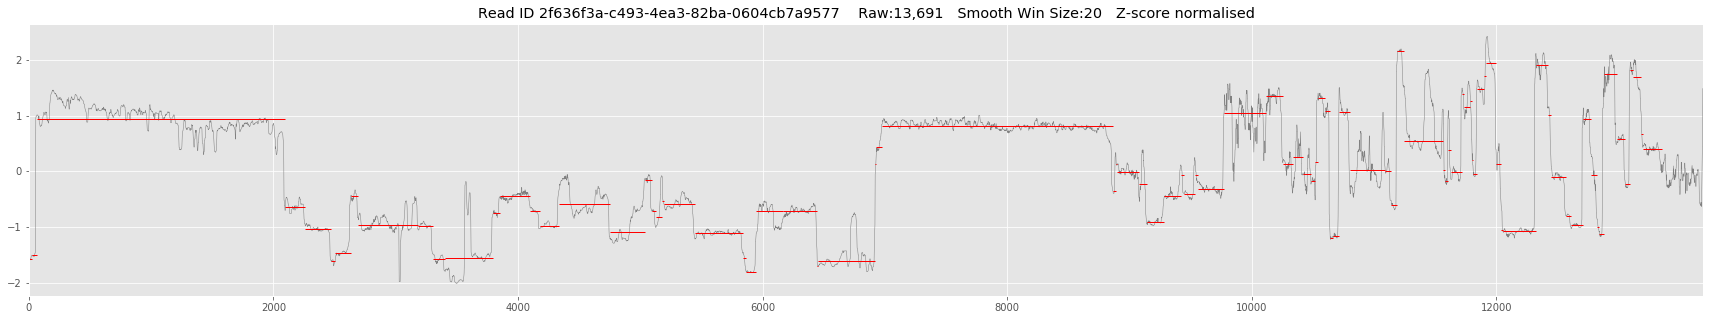

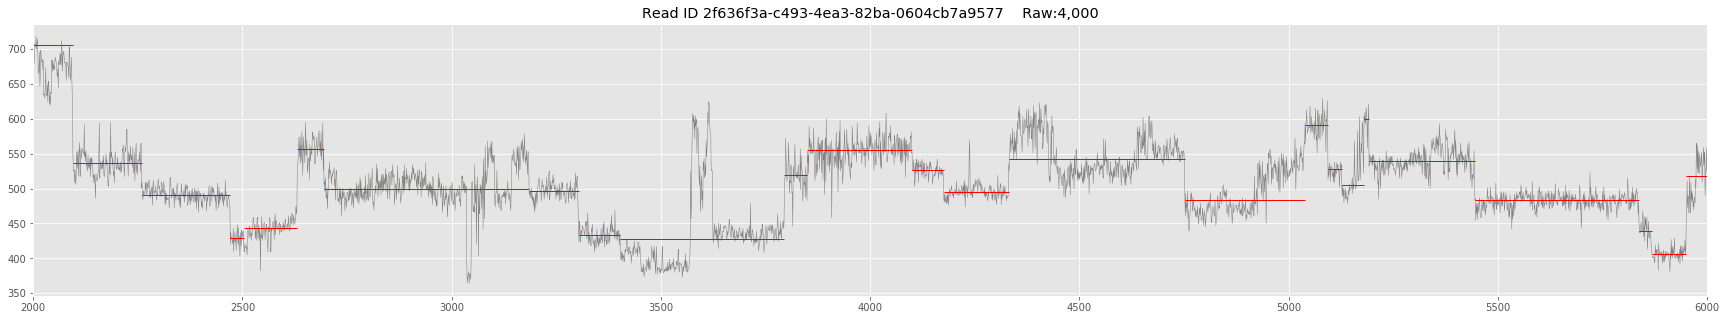

In [7]:
f = Fast5 (fast5_file="./data/0/RNA_control_02.fast5")
fig, ax = f.plot_raw ()
fig, ax = f.plot_raw (smoothing_win_size=3, kmer_boundaries=True)
fig, ax = f.plot_raw (smoothing_win_size=20, zscore_norm=True, kmer_boundaries=True)
fig, ax = f.plot_raw (start = 2000, end = 6000, kmer_boundaries=True)

## Test get_raw

In [8]:
help(Fast5.get_raw, full=True)

* start INT

If defined the data will start at that value

* end INT

If defined the data will end at that value

* smoothing_win_size INT

If larger than 0 will smooth the signal with a moving median window of size X

* zscore_norm: BOOL (default False)

If True the raw will be normalized using the zscore formula

In [15]:
f = Fast5 (fast5_file="./data/0/RNA_control_02.fast5")
display (f.get_raw ())
display (f.get_raw (zscore_norm=True))
display (f.get_raw (smoothing_win_size=5))
display (f.get_raw (start=2000, smoothing_win_size=5))
display (f.get_raw (start=2000, end= 2005, smoothing_win_size=5))

array([684, 455, 457, ..., 653, 616, 766], dtype=int16)

array([ 0.73625671, -1.35541414, -1.33714627, ...,  0.45310476,
        0.11514921,  1.48523929])

array([ 457.,  455.,  449., ...,  653.,  691.,  766.])

array([ 702.,  702.,  703., ...,  653.,  691.,  766.])

array([ 702.,  702.,  703.,  707.,  707.])

# Test Helper_fun

## Test find_fast5_file_gen

In [3]:
help (find_fast5_files_gen, full=True)

Generator returning fast5 files found recursively starting from a given folder.

The recursivity stops as soon as a file matching the extension is found.

* fast5_dir: STR

Path to the folder containing Fast5 files (can be in multiple subfolder)

In [40]:
for i in find_fast5_files_gen ("./dist/"):
    print(i, line_height=1)

In [39]:
for i in find_fast5_files_gen ("./data/"):
    print(i, line_height=1)

## Test find_fast5_file_list

In [34]:
help (find_fast5_files_list, full=True)

Return a list of fast5 files found recursively starting from a given folder.

The recursivity stops as soon as a file matching the extension is found.

* fast5_dir: STR

Path to the folder containing Fast5 files (can be in multiple subfolder)

* shuffle_files: BOOL (default False)

Shuffle files before returning the list

* max_files: INT (default None)

if set will return n randomly selected files out of the list

In [37]:
for i in find_fast5_files_list ("./dist/"):
    print(i, line_height=1)

In [38]:
for i in find_fast5_files_list ("./data/", shuffle_files=True):
    print(i, line_height=1)

In [42]:
for i in find_fast5_files_list ("./data/", max_files=10):
    print(i, line_height=1)

# Dev

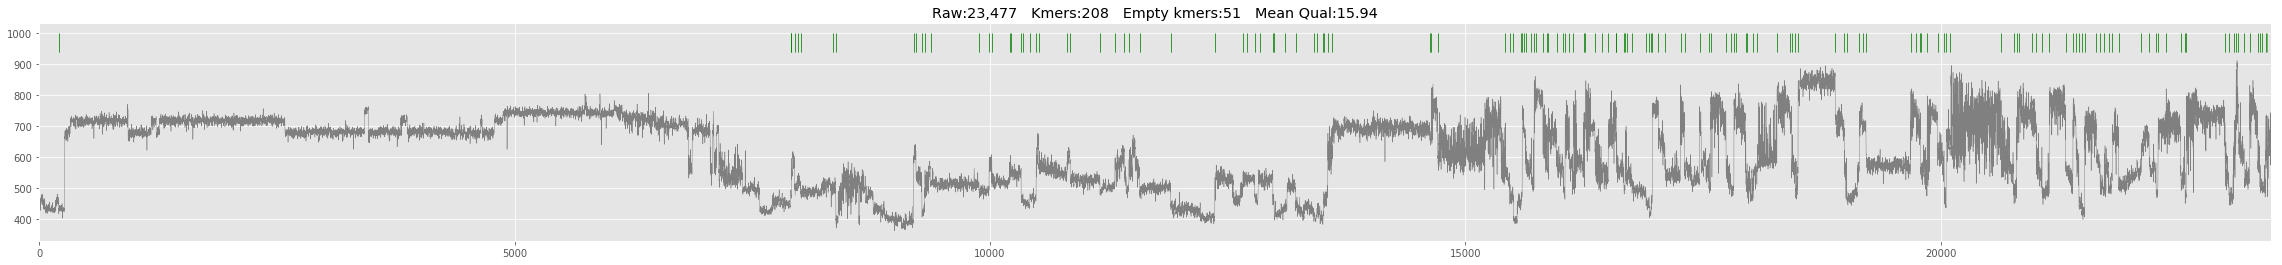

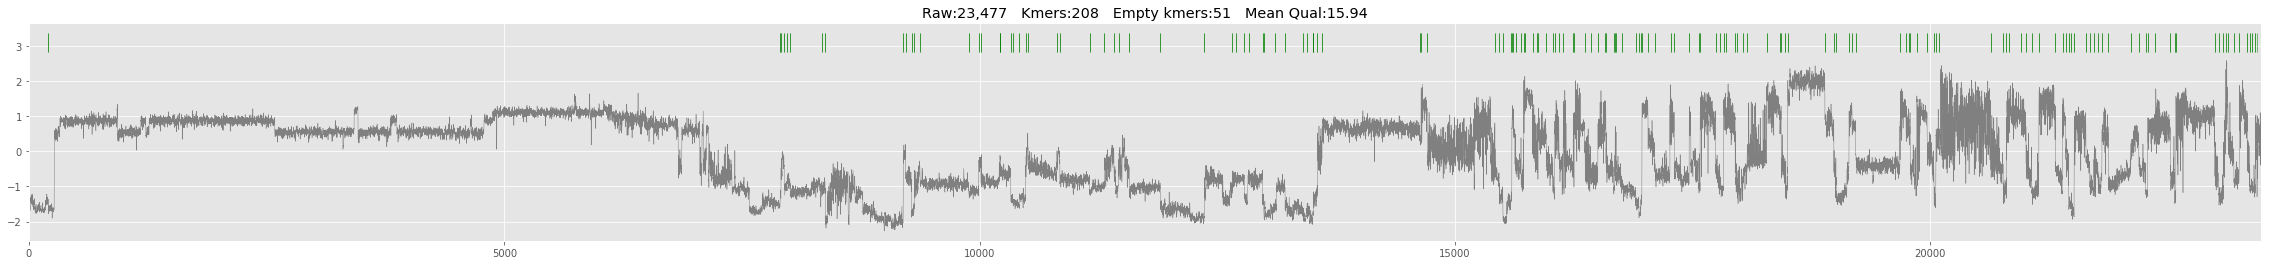

In [4]:
f = Fast5 (fast5_file="./data/0/RNA_control_03.fast5", zscore_norm=False)
fig = pl.figure(figsize=(40,4))
ax = f.plot_raw()

f = Fast5 (fast5_file="./data/0/RNA_control_03.fast5", zscore_norm=True)
fig = pl.figure(figsize=(40,4))
ax = f.plot_raw()

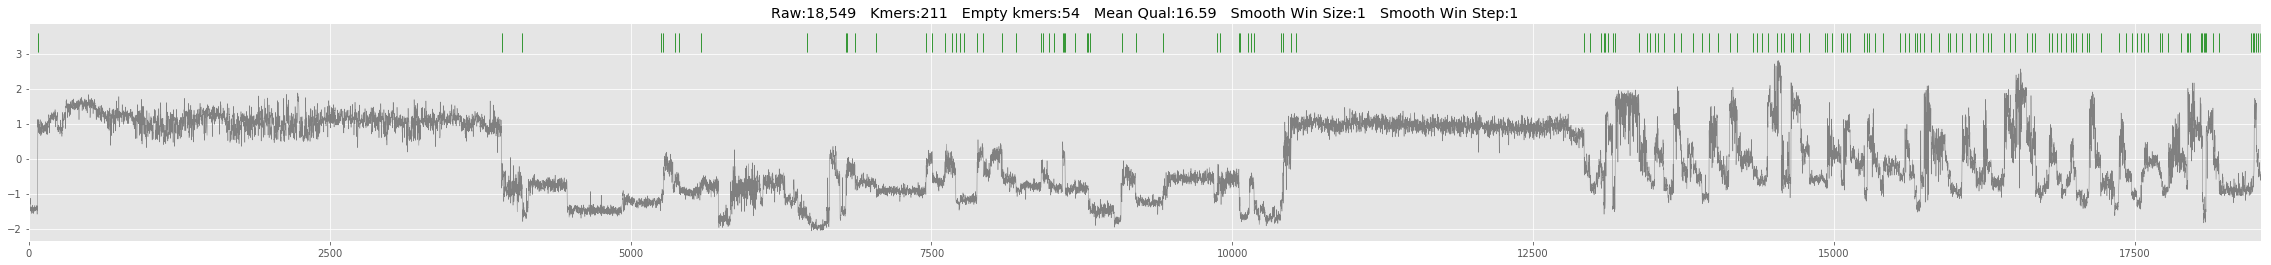

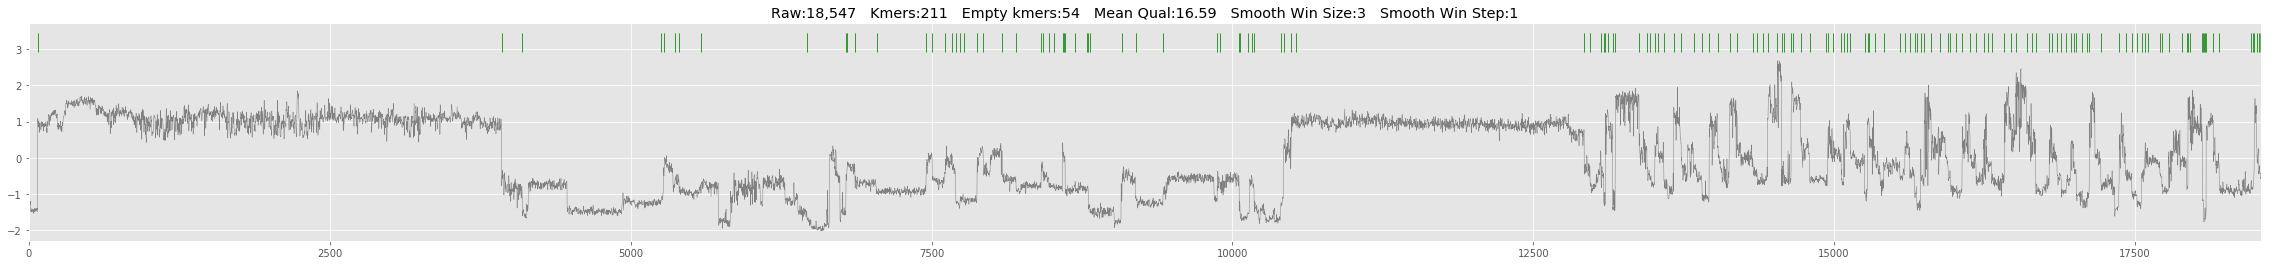

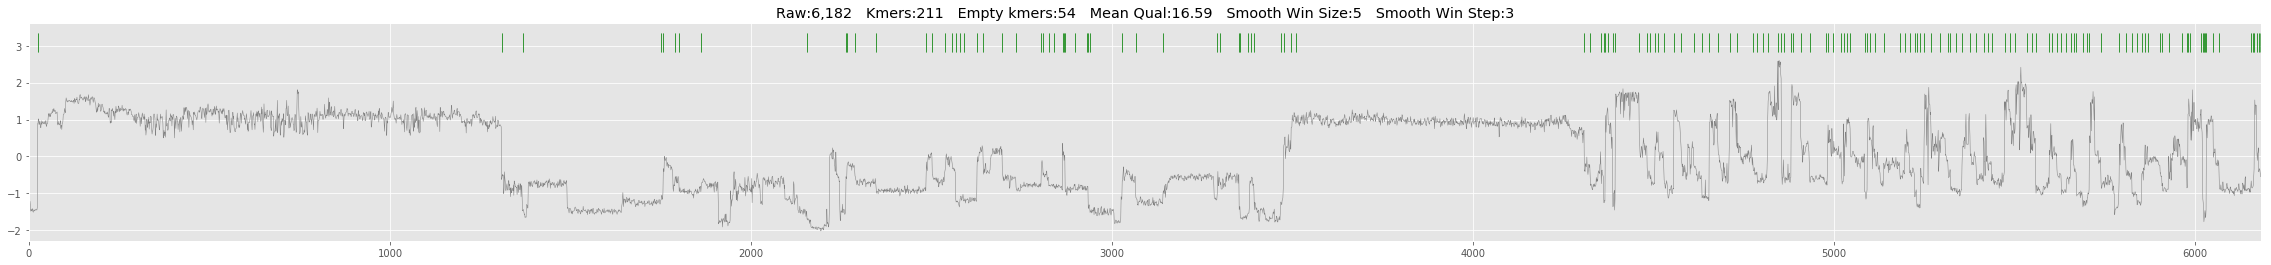

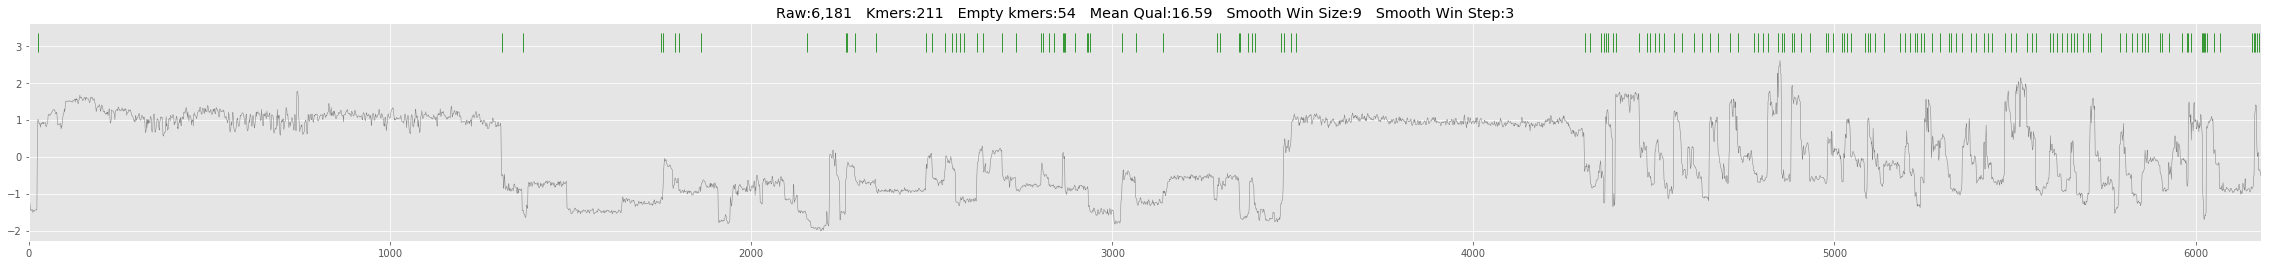

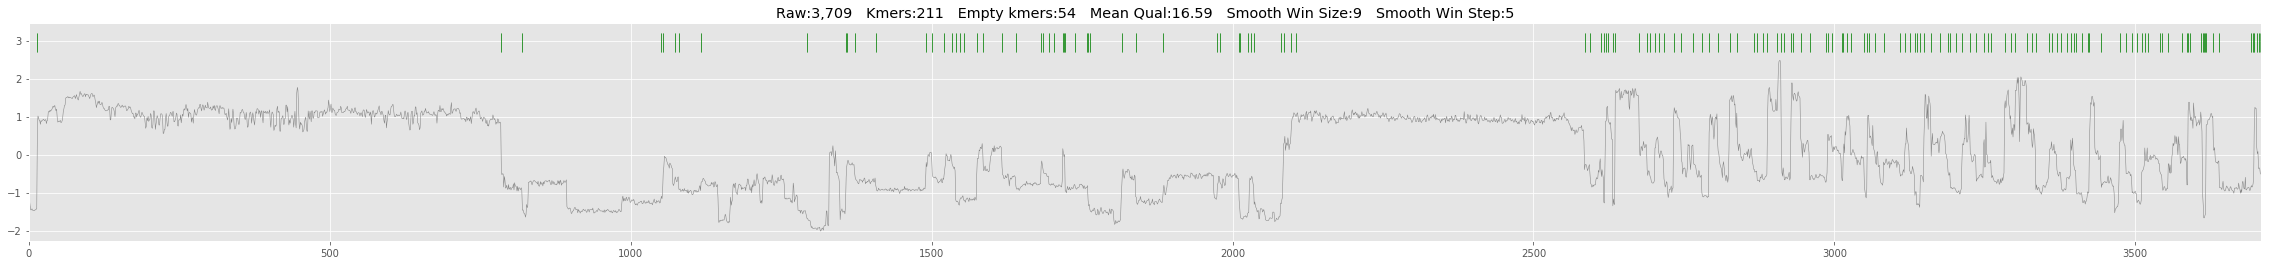

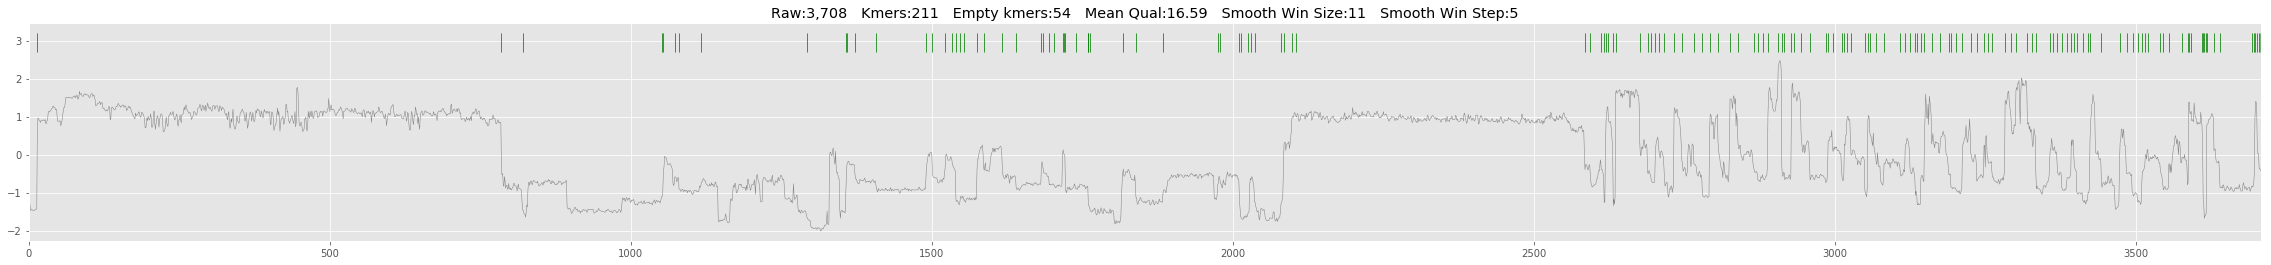

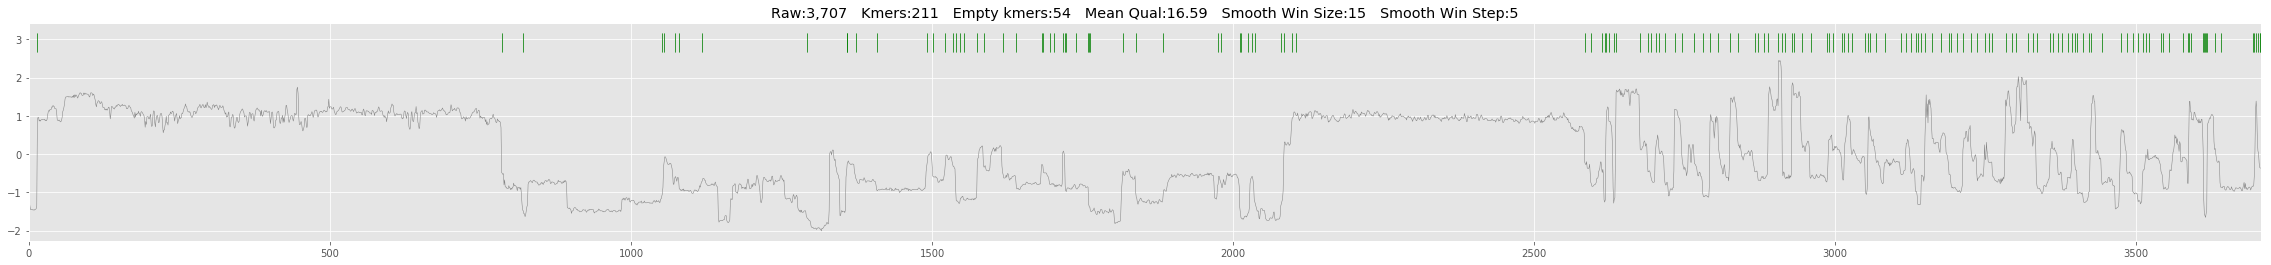

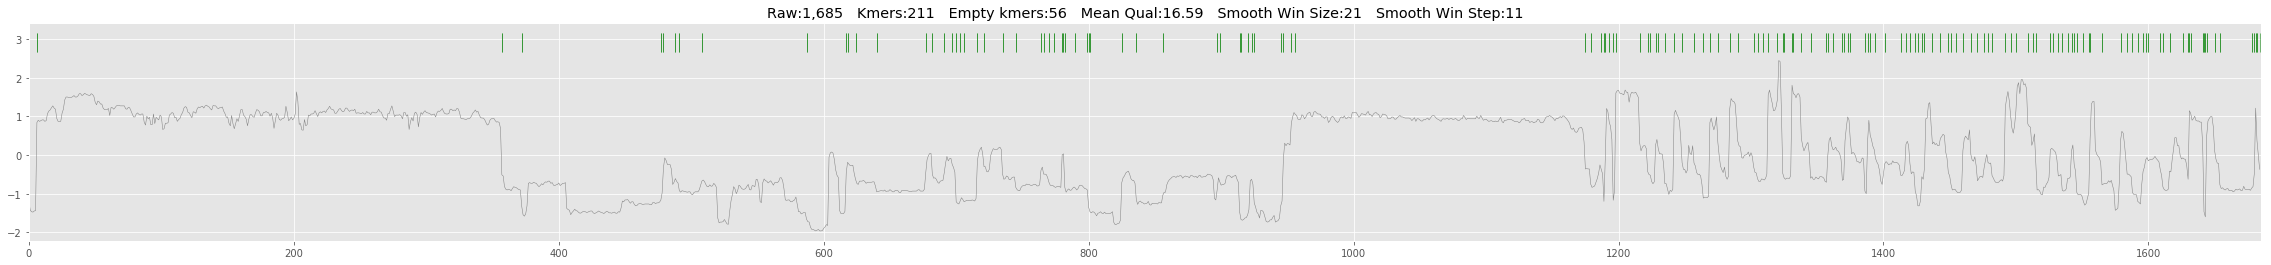

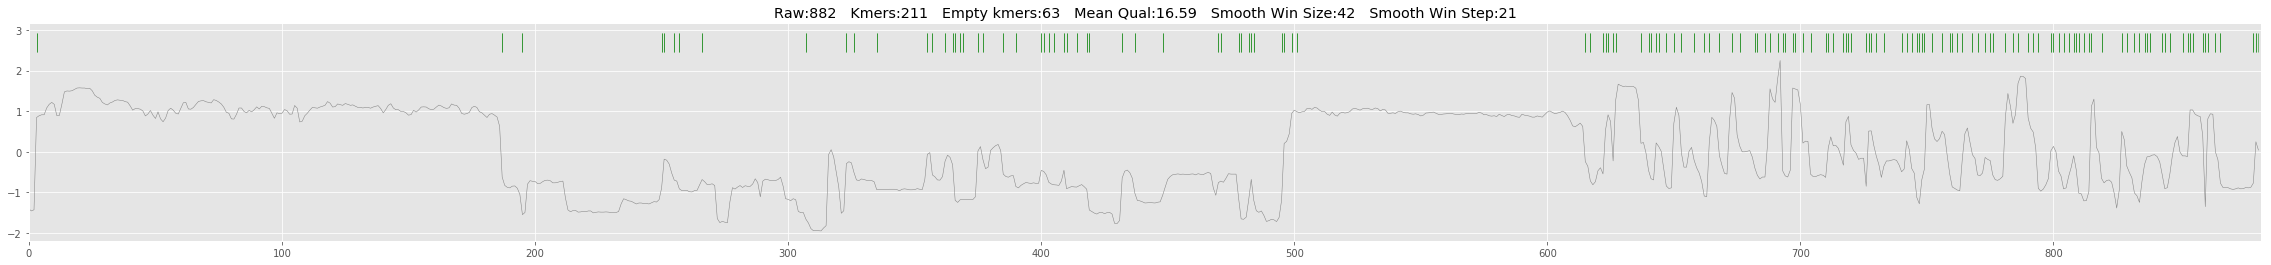

In [7]:
for win_size, win_step in [(1,1),(3,1),(5,3),(9,3),(9,5),(11,5),(15,5),(21,11),(42,21)]:
    f = Fast5 (fast5_file="./data/0/RNA_control_05.fast5", smooth_raw_signal=True, smoothing_win_size=win_size, smoothing_win_step=win_step, zscore_norm=True)
    fig = pl.figure(figsize=(40,4))
    ax = f.plot_raw()

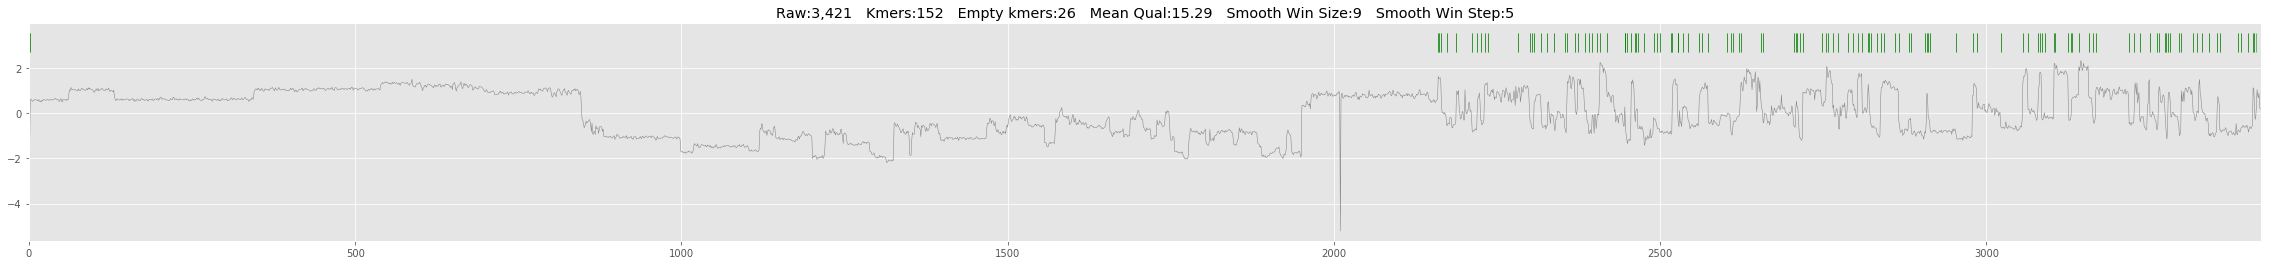

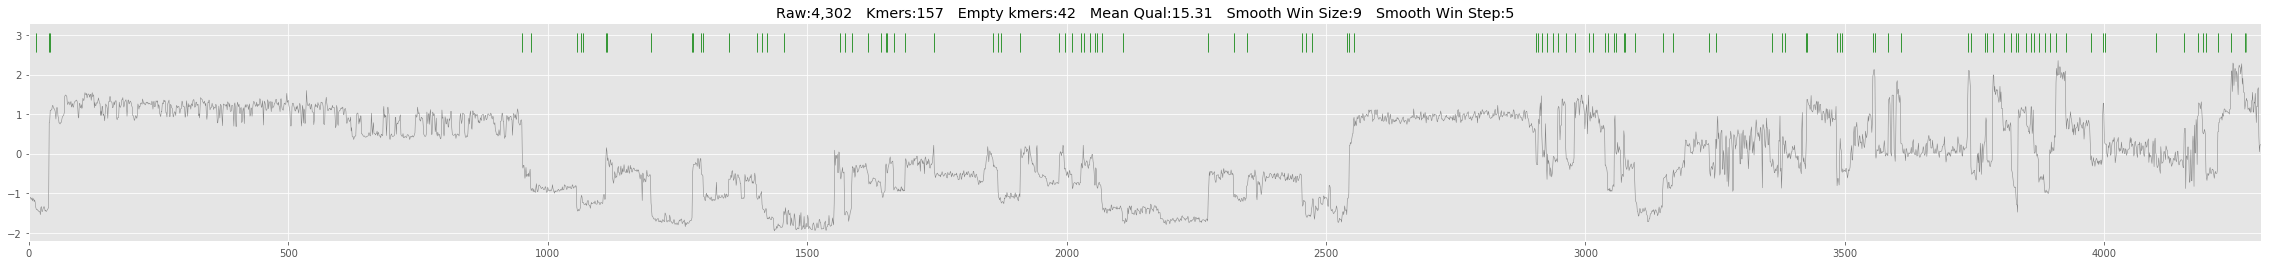

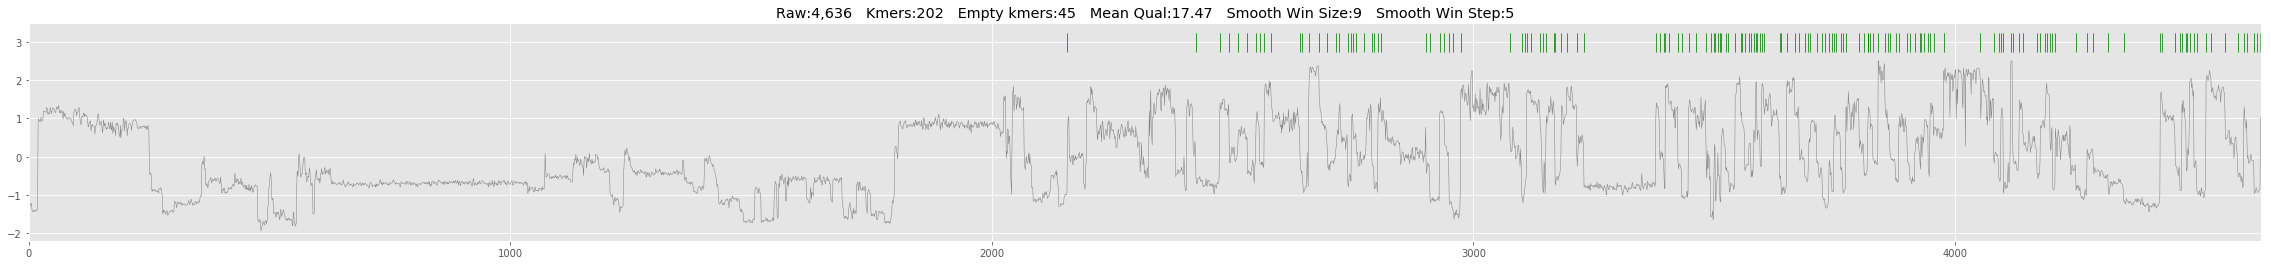

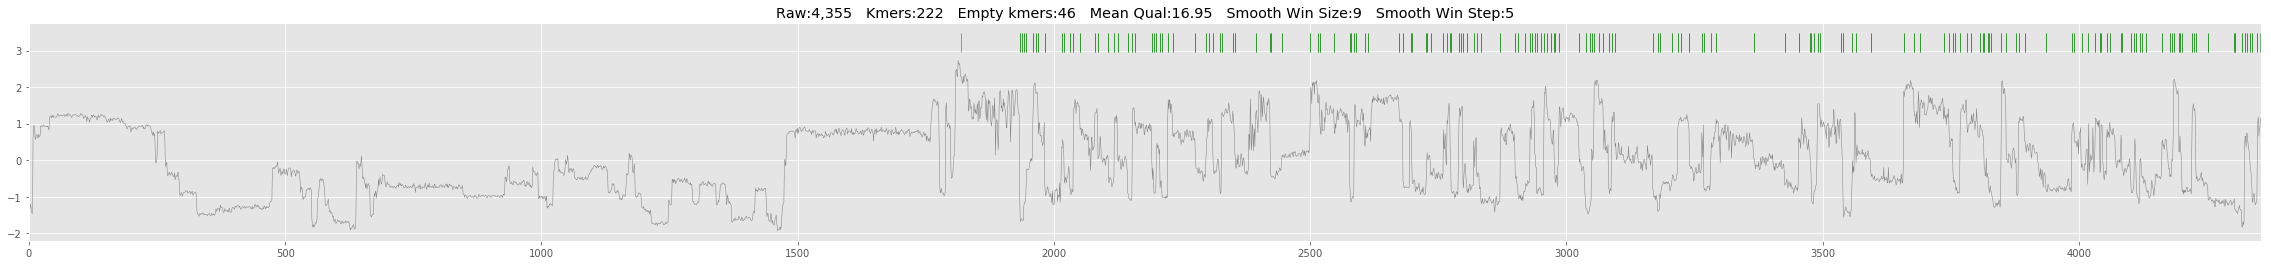

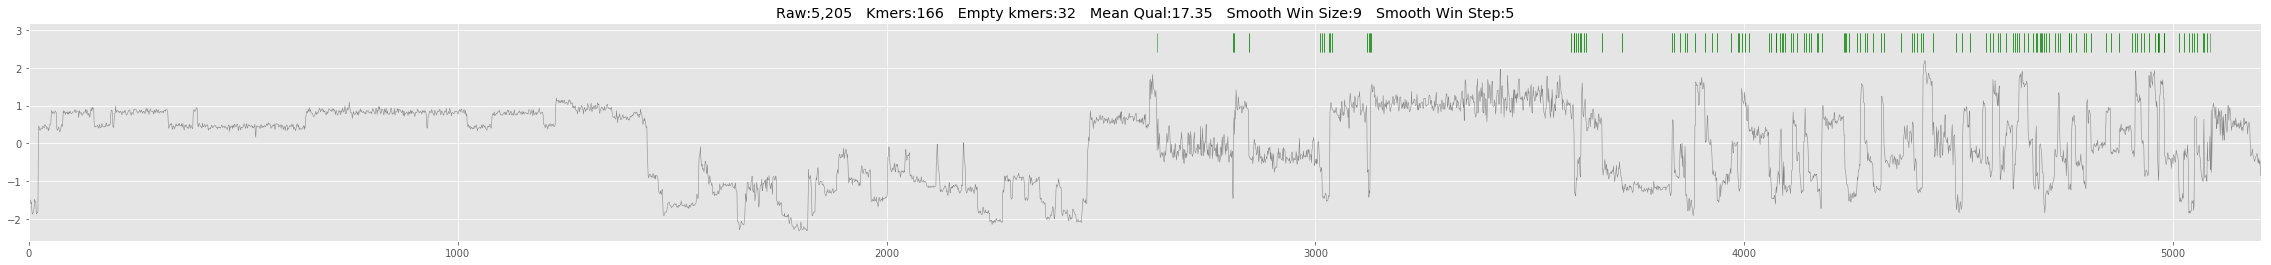

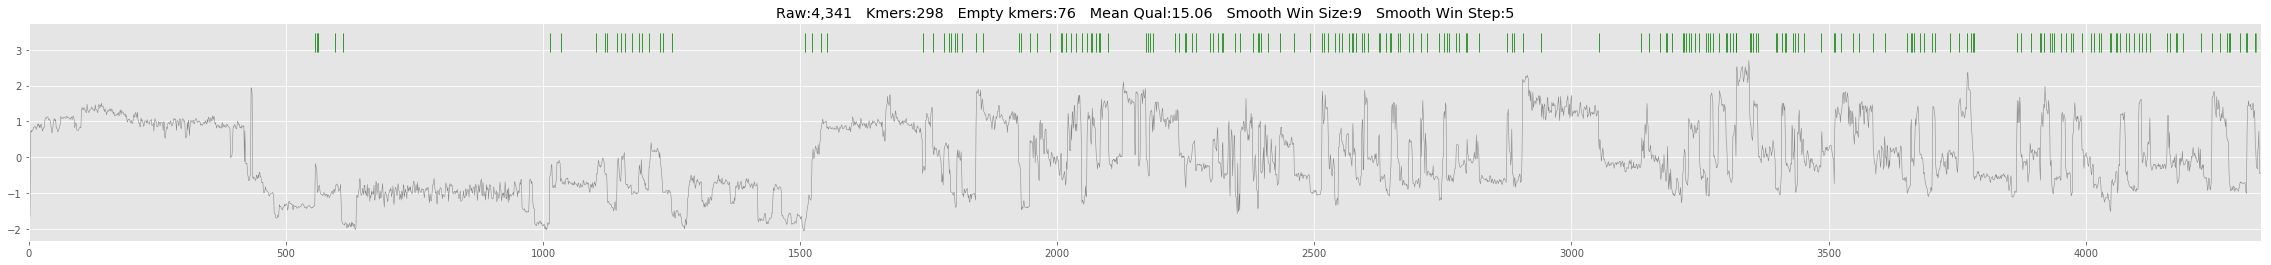

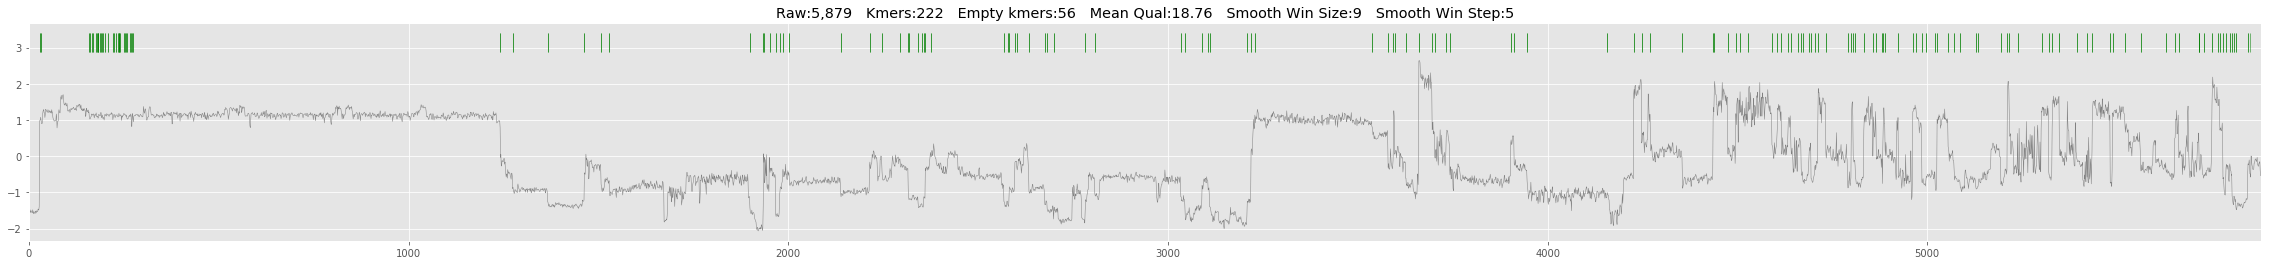

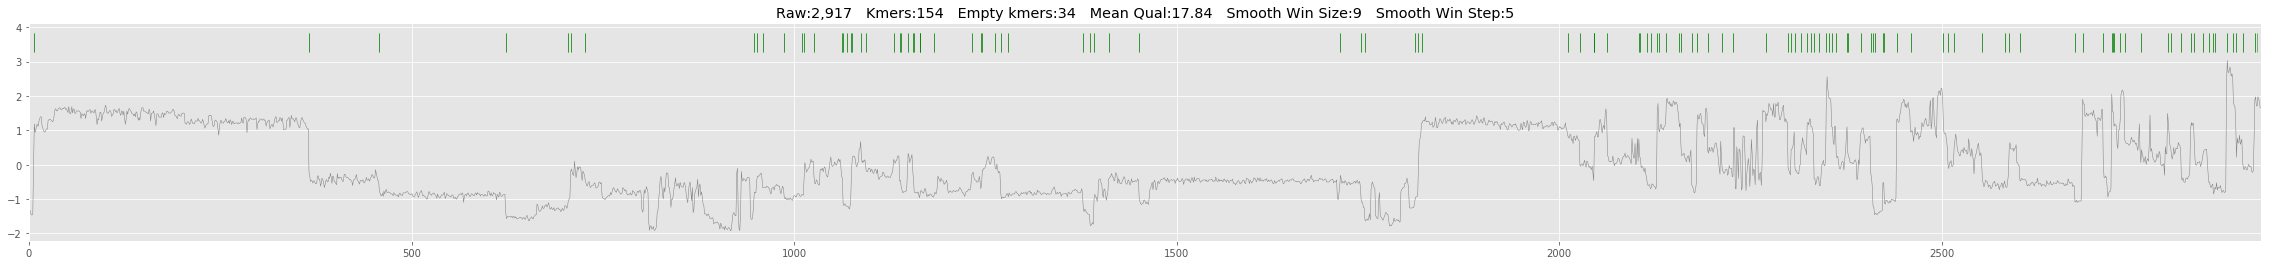

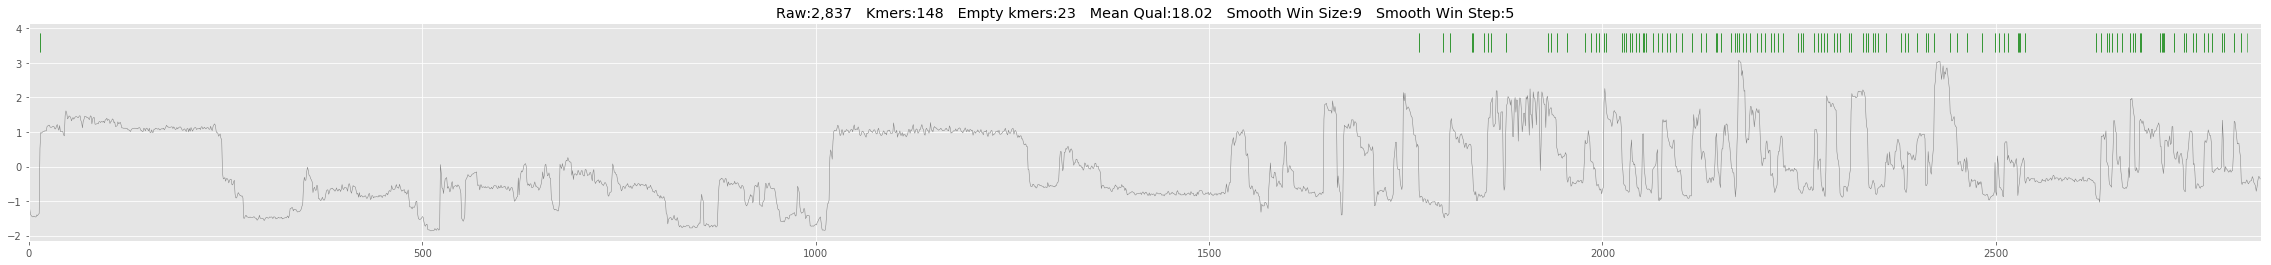

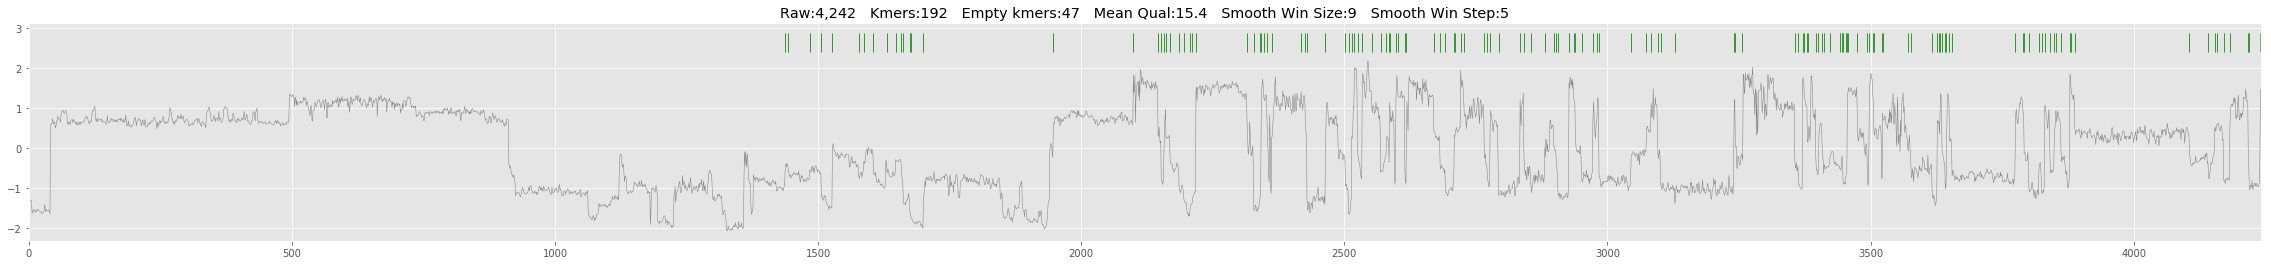

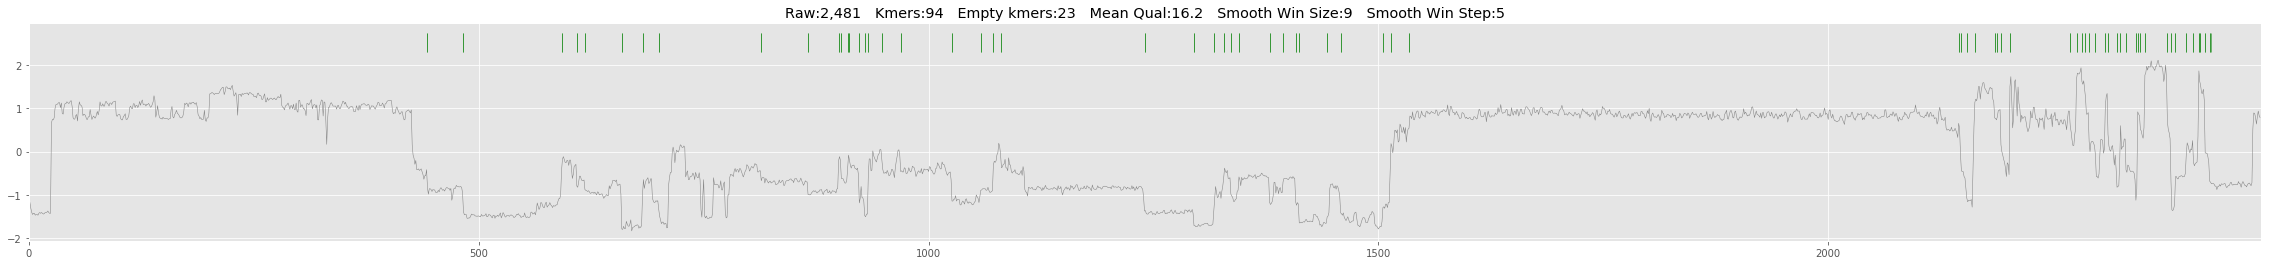

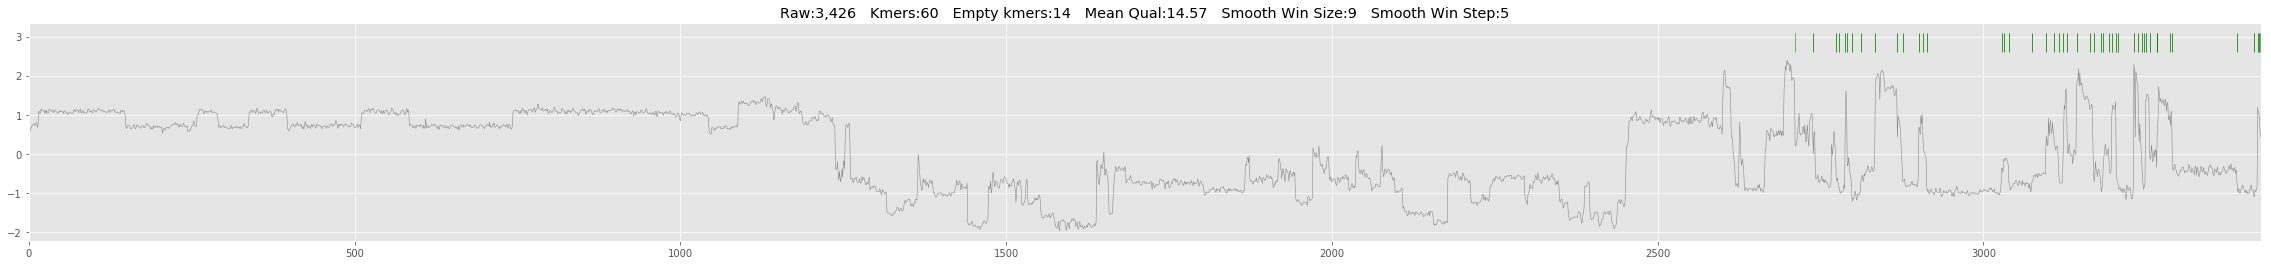

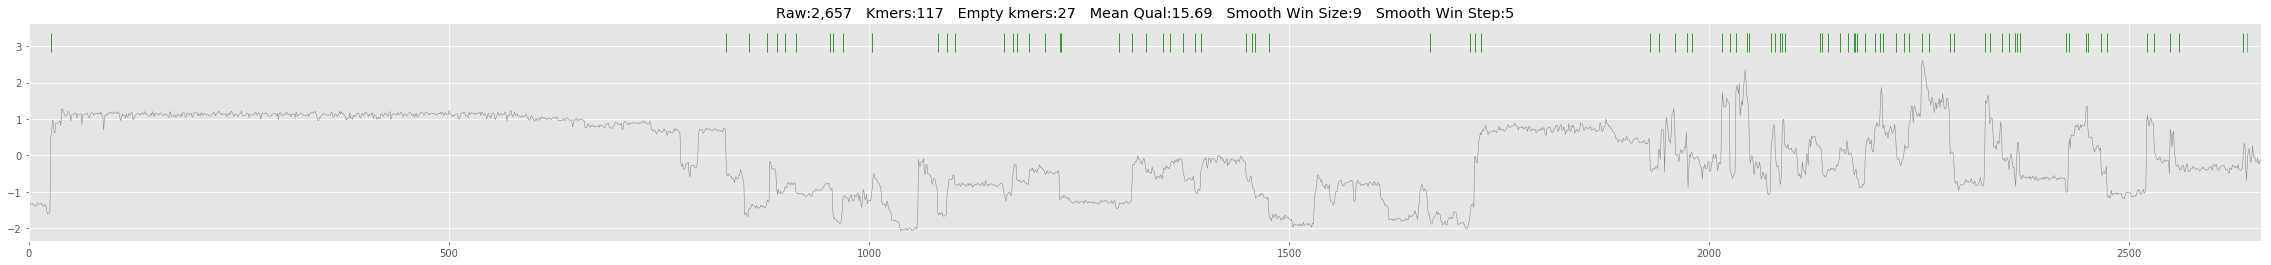

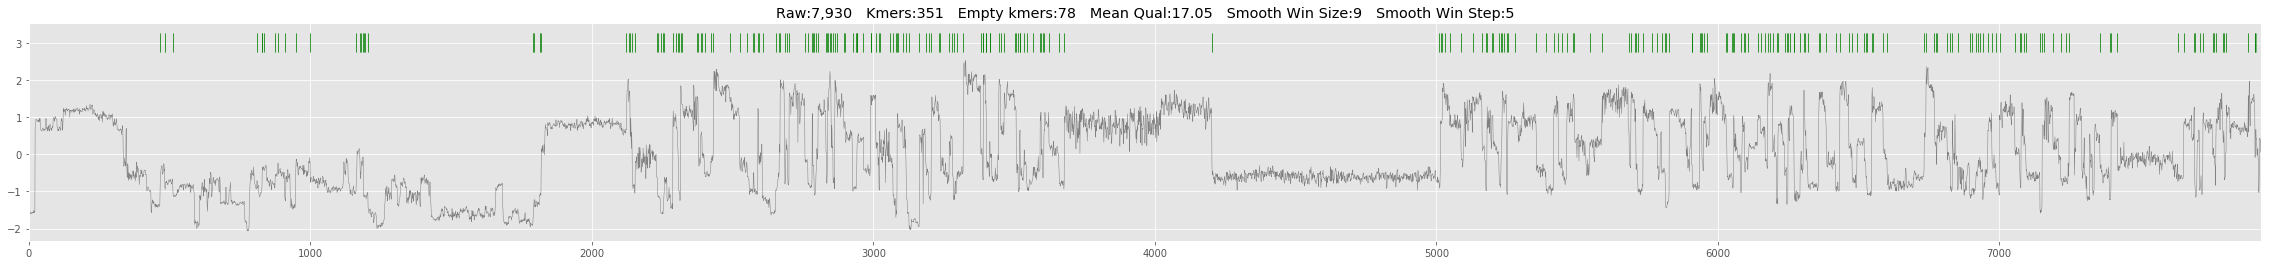

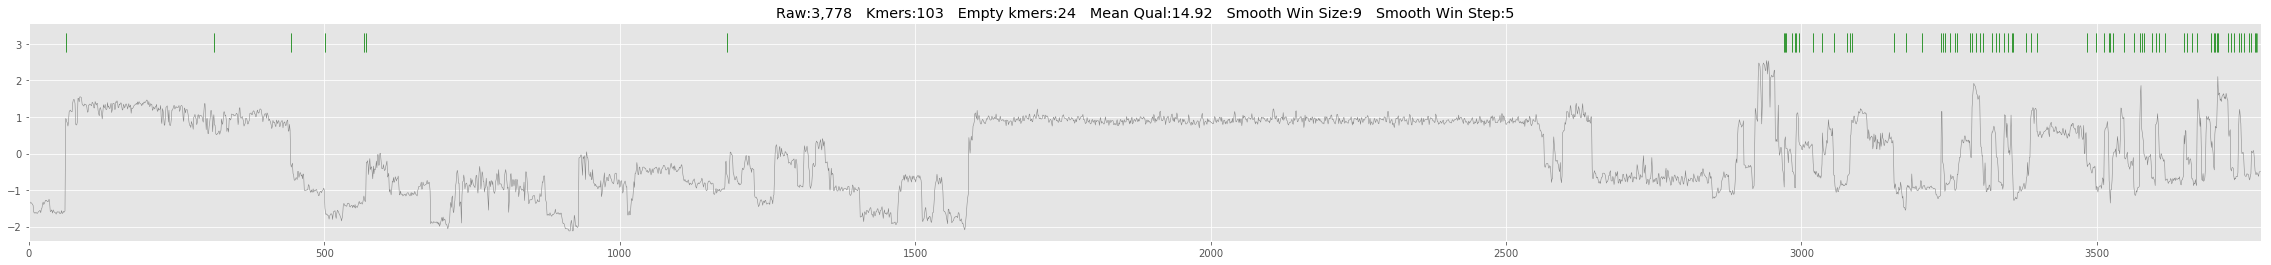

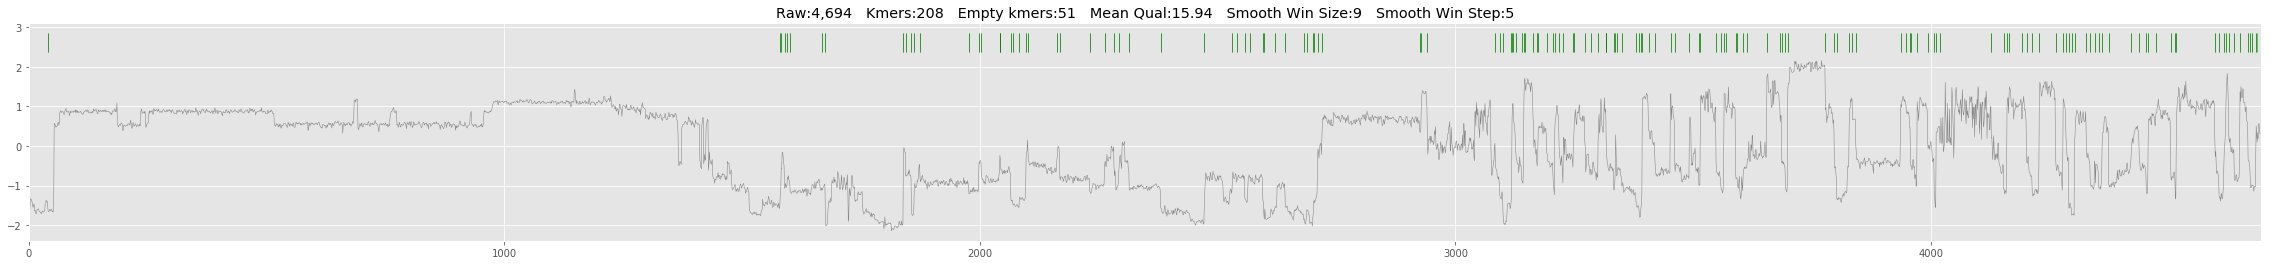

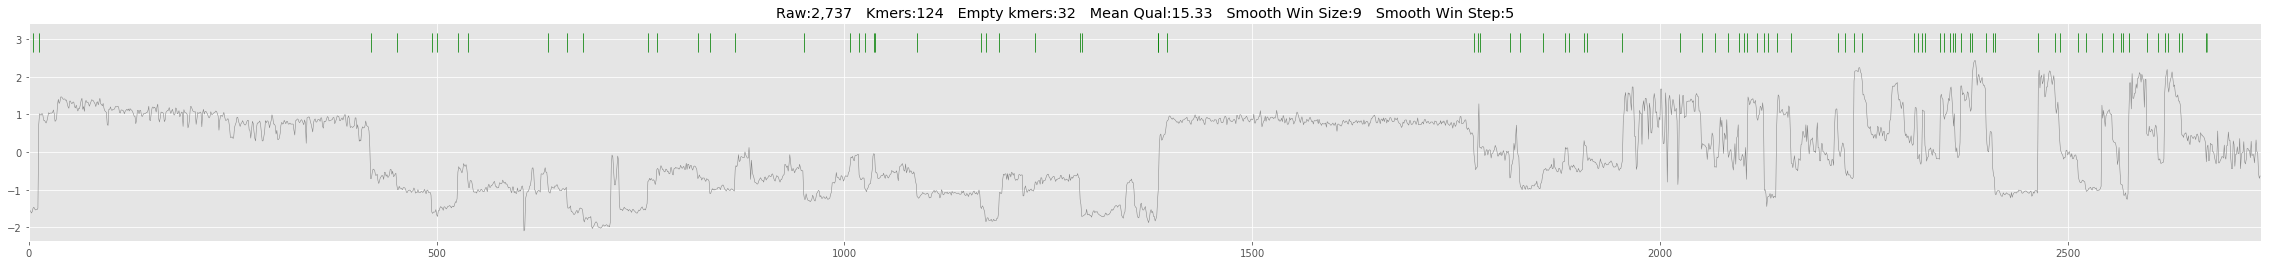

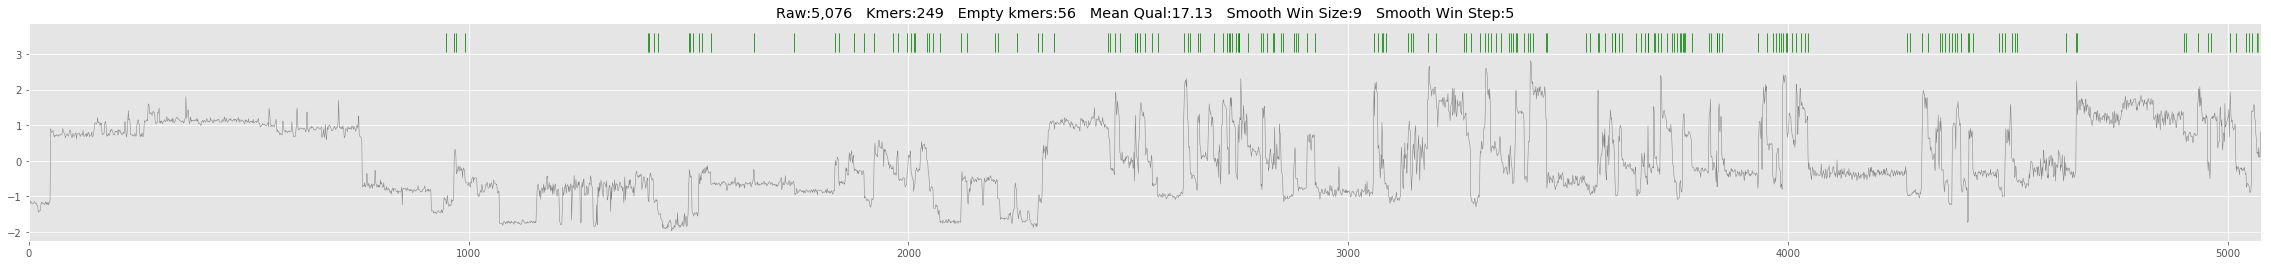

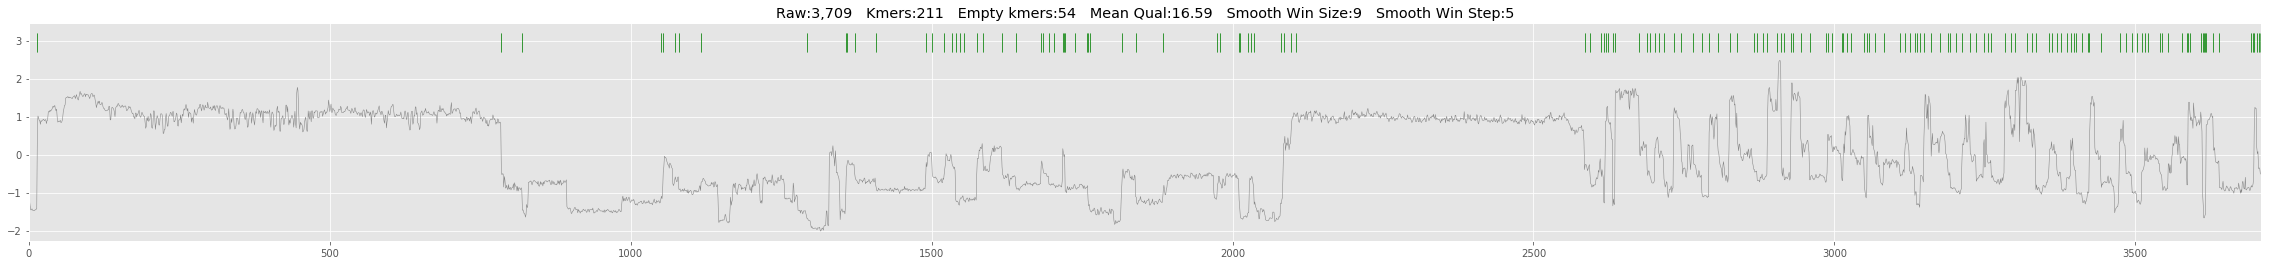

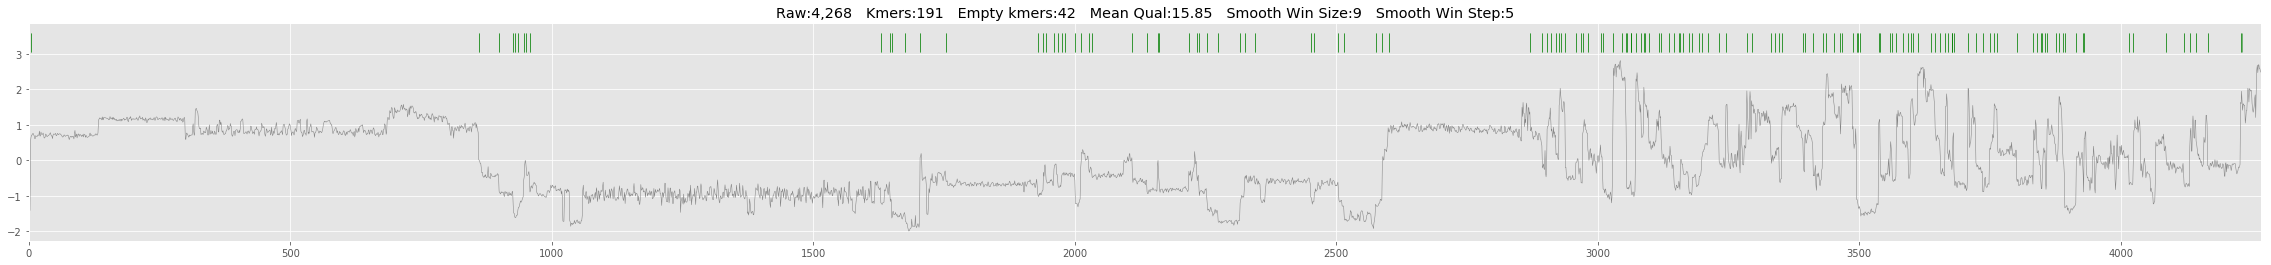

In [8]:
for fn in find_fast5_files_gen ("./data/"):
    try:
        f = Fast5 (fast5_file=fn, smooth_raw_signal=True, smoothing_win_size=9, smoothing_win_step=5, zscore_norm=True)
        fig = pl.figure(figsize=(40,4))
        ax = f.plot_raw()
    except AssertionError as E:
        print (E)

# Dev Fast5_parse